In [18]:
import plotly.graph_objects as go
import numpy as np


def minimum_jerk_trajectory(points, T, frequency):
    num_points = len(points)
    timefreq = int(T * frequency) + 1

    a = np.zeros((6, num_points))
    a[0, :] = points[:, 0]
    a[1, :] = points[:, 1]
    a[2, :] = points[:, 2] / 2

    b = np.zeros((num_points, 3, 3))
    b[:, 0, 0] = T ** 3
    b[:, 0, 1] = T ** 4
    b[:, 0, 2] = T ** 5
    b[:, 1, 0] = 3 * T ** 2
    b[:, 1, 1] = 4 * T ** 3
    b[:, 1, 2] = 5 * T ** 4
    b[:, 2, 0] = 6 * T
    b[:, 2, 1] = 12 * T ** 2
    b[:, 2, 2] = 20 * T ** 3

    c = np.zeros((num_points, 3))
    c[:, 0] = points[:, 3] - a[0, :] - a[1, :] * T - a[2, :] * T ** 2
    c[:, 1] = points[:, 4] - a[1, :] - 2 * a[2, :] * T
    c[:, 2] = points[:, 5] - 2 * a[2, :]

    trajectory = []
    trajectory_derivative = []
    acceleration = []
    jerk = []

    for time in range(1, timefreq):
        t = time / timefreq
        pos = np.sum(a * np.array([t ** i for i in range(6)]).reshape(6, 1, -1), axis=0)
        vel = np.sum(a[1:] * np.array([(i + 1) * t ** i for i in range(5)]).reshape(5, 1, -1), axis=0)
        acc = np.sum(a[2:] * np.array([(i + 1) * i * t ** (i - 1) for i in range(4)]).reshape(4, 1, -1), axis=0)
        j = np.sum(a[3:] * np.array([(i + 1) * i * (i - 1) * t ** (i - 2) for i in range(3)]).reshape(3, 1, -1), axis=0)

        trajectory.append(pos)
        trajectory_derivative.append(vel)
        acceleration.append(acc)
        jerk.append(j)

    return trajectory, trajectory_derivative, acceleration, jerk


# Set up points and parameters.
points = np.array([
    [0.0, 0.0, 0.0, 10.0, 2.0, 2.0]
])

T = 1.0
frequency = 100

traj, traj_vel, traj_acc, traj_jerk = minimum_jerk_trajectory(points, T, frequency)

# Create plot.
xaxis = np.arange(1, len(traj) + 1) / frequency

fig = go.Figure()
fig.add_trace(go.Scatter(x=xaxis, y=np.array(traj)[:, 0, 0], name='Position'))
fig.add_trace(go.Scatter(x=xaxis, y=np.array(traj_vel)[:, 0, 0], name='Velocity'))
fig.add_trace(go.Scatter(x=xaxis, y=np.array(traj_acc)[:, 0, 0], name='Acceleration'))
fig.add_trace(go.Scatter(x=xaxis, y=np.array(traj_jerk)[:, 0, 0], name='Jerk'))

fig.update_layout(
    title="Minimum jerk trajectory",
    xaxis_title="Time [s]",
    yaxis_title="Value",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.show()


In [21]:
def test_minimum_jerk_trajectory():
    # Test case 1
    points = np.array([
        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
        [1.0, 0.0, 0.0, 2.0, 0.0, 0.0],
        [3.0, 0.0, 0.0, 4.0, 0.0, 0.0],
        [5.0, 0.0, 0.0, 6.0, 0.0, 0.0]
    ])
    T = 1.0
    frequency = 100
    traj, traj_vel, traj_acc, traj_jerk = minimum_jerk_trajectory(points, T, frequency)
    
    # Print lengths for debugging
    print("Length of traj:", len(traj))
    print("Length of traj_vel:", len(traj_vel))
    print("Length of traj_acc:", len(traj_acc))
    print("Length of traj_jerk:", len(traj_jerk))
    print("Expected length:", len(points) - 1)
    
    # Perform assertions or checks on the output
    assert len(traj) == len(points) - 1
    assert len(traj_vel) == len(points) - 1
    assert len(traj_acc) == len(points) - 1
    assert len(traj_jerk) == len(points) - 1

    # Test case 2
    points = np.array([
        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
        [2.0, 0.0, 0.0, 3.0, 0.0, 0.0],
        [5.0, 0.0, 0.0, 4.0, 0.0, 0.0]
    ])
    T = 2.0
    frequency = 200
    traj, traj_vel, traj_acc, traj_jerk = minimum_jerk_trajectory(points, T, frequency)
    
    # Print lengths for debugging
    print("Length of traj:", len(traj))
    print("Length of traj_vel:", len(traj_vel))
    print("Length of traj_acc:", len(traj_acc))
    print("Length of traj_jerk:", len(traj_jerk))
    print("Expected length:", len(points) - 1)
    
    # Perform assertions or checks on the output
    assert len(traj) == len(points) - 1
    assert len(traj_vel) == len(points) - 1
    assert len(traj_acc) == len(points) - 1
    assert len(traj_jerk) == len(points) - 1

    # Add more test cases if needed

# Run the test case
test_minimum_jerk_trajectory()


Length of traj: 100
Length of traj_vel: 100
Length of traj_acc: 100
Length of traj_jerk: 100
Expected length: 3


AssertionError: 

In [24]:
points.shape

(1, 6)

In [30]:
traj[0].shape

(6, 1)

In [32]:
import plotly.graph_objects as go
import numpy as np

def minimum_jerk_trajectory(points, T, frequency):
    num_points = len(points)
    timefreq = int(T * frequency) + 1

    a = np.zeros((6, num_points))
    a[0, :] = points[:, 0]
    a[1, :] = points[:, 1]
    a[2, :] = points[:, 2] / 2

    b = np.zeros((num_points, 3, 3))
    b[:, 0, 0] = T ** 3
    b[:, 0, 1] = T ** 4
    b[:, 0, 2] = T ** 5
    b[:, 1, 0] = 3 * T ** 2
    b[:, 1, 1] = 4 * T ** 3
    b[:, 1, 2] = 5 * T ** 4
    b[:, 2, 0] = 6 * T
    b[:, 2, 1] = 12 * T ** 2
    b[:, 2, 2] = 20 * T ** 3

    c = np.zeros((num_points, 3))
    c[:, 0] = points[:, 3] - a[0, :] - a[1, :] * T - a[2, :] * T ** 2
    c[:, 1] = points[:, 4] - a[1, :] - 2 * a[2, :] * T
    c[:, 2] = points[:, 5] - 2 * a[2, :]

    for i in range(num_points):
        a[3:, i] = np.linalg.solve(b[i], c[i])

    trajectory = []
    trajectory_derivative = []
    acceleration = []
    jerk = []

    for time in range(1, timefreq):
        t = time / timefreq
        pos = np.sum(a * np.array([t ** i for i in range(6)]).reshape(6,-1), axis=0)
        vel = np.sum(a[1:] * np.array([(i + 1) * t ** i for i in range(5)]).reshape(5,-1), axis=0)
        acc = np.sum(a[2:] * np.array([(i + 1) * i * t ** (i - 1) for i in range(4)]).reshape(4,-1), axis=0)
        j = np.sum(a[3:] * np.array([(i + 1) * i * (i - 1) * t ** (i - 2) for i in range(3)]).reshape(3,-1), axis=0)

        trajectory.append(pos)
        trajectory_derivative.append(vel)
        acceleration.append(acc)
        jerk.append(j)

    return trajectory, trajectory_derivative, acceleration, jerk

# Set up points and parameters.
# Set up points and parameters.
points = np.array([
    [0.0, -10.0, 0.0, 0.0, 0.0, 0.0], # position, velocity and acceleration at point 0
    [1.0,   -9.8, 2.0, 0.0, 2.0, 0.0], # position, velocity and acceleration at point 1
    [3.0,-10.5, 0.0, 0.0, 0.0, 0.0] # position, velocity and acceleration at point 2
])


T = .5
frequency = .01

traj_x,traj_y,traj_z,traj_w= minimum_jerk_trajectory(points,T,frequency)

# Create plot.
xaxis=np.arange(1,len(traj_x)+1)/frequency

fig=go.Figure()
fig.add_trace(go.Scatter(x=xaxis,y=np.array(traj_x)[:,0],name='Position'))
fig.add_trace(go.Scatter(x=xaxis,y=np.array(traj_y)[:,0],name='Velocity'))
fig.add_trace(go.Scatter(x=xaxis,y=np.array(traj_z)[:,0],name='Acceleration'))
fig.add_trace(go.Scatter(x=xaxis,y=np.array(traj_w)[:,0],name='Jerk'))

fig.update_layout(
title="Minimum jerk trajectory",
xaxis_title="Time [s]",
yaxis_title="Value",
legend=dict(
orientation="h",
yanchor="bottom",
y=1.02,
xanchor="right",
x=1
)
)

fig.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [5]:
min_jerk(pos=np.array([[0,1]]), dur=100, vel=None, acc=None, psg=None)

[]


IndexError: index 1 is out of bounds for axis 0 with size 1

In [7]:
# trj, psg = min_jerk(pos, dur, vel, acc, psg)
# 
# Compute minimum-jerk trajectory through specified points
#
# INPUTS:
# pos: NxD array with the D-dimensional coordinates of N points
# dur: number of time steps (integer)
# vel: 2xD array with endpoint velocities, [] sets vel to 0
# acc: 2xD array with endpoint accelerations, [] sets acc to 0
# psg: (N-1)x1 array of via-point passage times (between 0 and dur);
#      [] causes optimization over the passage times
#
# OUTPUTS
# trj: dur x D array with the minimum-jerk trajectory
# psg: (N-1)x1 array of passage times
#
# This is an implementation of the algorithm described in:
#  Todorov, E. and Jordan, M. (1998) Smoothness maximization along
#  a predefined path accurately predicts the speed profiles of
#  complex arm movements. Journal of Neurophysiology 80(2): 696-714
# The paper is available online at www.cogsci.ucsd.edu/~todorov

# Copyright (C) Emanuel Todorov, 1998-2006
# Python implementation by Dogancan Kebude

import math
import numpy as np
import scipy.optimize
from numpy.linalg import inv

def min_jerk(pos=None, dur=None, vel=None, acc=None, psg=None):

    N = pos.shape[0]					# number of point
    D = pos.shape[1]					# dimensionality

    if vel is None:
        vel = np.zeros((2,D))			# default endpoint vel is 0
    if acc is None:
        acc = np.zeros((2,D))			# default endpoint acc is 0

    t0 = np.array([[0],[dur]])

    if psg is None:					# passage times unknown, optimize
        if N > 2:
            psg = np.arange(dur/(N-1), dur-dur/(N-1)+1, dur/(N-1)).T
            func = lambda psg_: mjCOST(psg_, pos, vel, acc, t0)
            psg = scipy.optimize.fmin(func = func, x0 = psg)
        else:
            psg = []

    print(psg)

    trj = mjTRJ(psg, pos, vel, acc, t0, dur)

    return trj, psg

################################################################
###### Compute jerk cost
################################################################

def mjCOST(t, x, v0, a0, t0):

    N = max(x.shape)
    D = min(x.shape)

    v, a = mjVelAcc(t, x, v0, a0, t0)
    aa   = np.concatenate(([a0[0][:]], a, [a0[1][:]]), axis = 0)
    aa0  = aa[0:N-1][:]
    aa1  = aa[1:N][:]
    vv   = np.concatenate(([v0[0][:]], v, [v0[1][:]]), axis = 0)
    vv0  = vv[0:N-1][:]
    vv1  = vv[1:N][:]
    tt   = np.concatenate((t0[0]   , t, t0[1]   ), axis = 0)
    T    = np.diff(tt)[np.newaxis].T*np.ones((1,D))
    xx0  = x[0:N-1][:]
    xx1  = x[1:N][:]

    j=3*(3*aa0**2*T**4-2*aa0*aa1*T**4+3*aa1**2*T**4+24*aa0*T**3*vv0- \
         16*aa1*T**3*vv0 + 64*T**2*vv0**2 + 16*aa0*T**3*vv1 - \
         24*aa1*T**3*vv1 + 112*T**2*vv0*vv1 + 64*T**2*vv1**2 + \
         40*aa0*T**2*xx0 - 40*aa1*T**2*xx0 + 240*T*vv0*xx0 + \
         240*T*vv1*xx0 + 240*xx0**2 - 40*aa0*T**2*xx1 + 40*aa1*T**2*xx1- \
         240*T*vv0*xx1 - 240*T*vv1*xx1 - 480*xx0*xx1 + 240*xx1**2)/T**5

    J = sum(sum(abs(j)));

    return J

################################################################
###### Compute trajectory
################################################################

def mjTRJ(tx, x, v0, a0, t0, P):

    N = max(x.shape)
    D = min(x.shape)
    X_list = []

    if len(tx) > 0:
        v, a = mjVelAcc(tx, x, v0, a0, t0)
        aa   = np.concatenate(([a0[0][:]],  a, [a0[1][:]]), axis = 0)
        vv   = np.concatenate(([v0[0][:]],  v, [v0[1][:]]), axis = 0)
        tt   = np.concatenate((t0[0]   , tx, t0[1]   ), axis = 0)
    else:
        aa = a0
        vv = v0
        tt = t0

    ii = 0
    for i in range(1,int(P)+1):
        t = (i-1)/(P-1)*(t0[1]-t0[0]) + t0[0]
        if t > tt[ii+1]:
            ii = ii+1
        T = (tt[ii+1]-tt[ii])*np.ones((1,D))
        t = (t-tt[ii])*np.ones((1,D))
        aa0 = aa[ii][:]
        aa1 = aa[ii+1][:]
        vv0 = vv[ii][:]
        vv1 = vv[ii+1][:]
        xx0 = x[ii][:]
        xx1 = x[ii+1][:]

        tmp = aa0*t**2/2 + t*vv0 + xx0 + t**4*(3*aa0*T**2/2 - aa1*T**2 + \
											   8*T*vv0 + 7*T*vv1 + 15*xx0 - 15*xx1)/T**4 + \
              t**5*(-(aa0*T**2)/2 + aa1*T**2/2 - 3*T*vv0 - 3*T*vv1 - 6*xx0+ \
                    6*xx1)/T**5 + t**3*(-3*aa0*T**2/2 + aa1*T**2/2 - 6*T*vv0 - \
                                        4*T*vv1 - 10*xx0 + 10*xx1)/T**3
        X_list.append(tmp)

    X = np.concatenate(X_list)

    return X

################################################################
###### Compute intermediate velocities and accelerations
################################################################

def mjVelAcc(t, x, v0, a0, t0):

    N = max(x.shape)
    D = min(x.shape)
    mat = np.zeros((2*N-4,2*N-4))
    vec = np.zeros((2*N-4,D))
    tt = np.concatenate((t0[0], t, t0[1]), axis = 0)

    for i in range(1, 2*N-4+1, 2):

        ii = int(math.ceil(i/2.0))
        T0 = tt[ii]-tt[ii-1]
        T1 = tt[ii+1]-tt[ii]

        tmp = [-6/T0, -48/T0**2, 18*(1/T0+1/T1), \
               72*(1/T1**2-1/T0**2), -6/T1, 48/T1**2]

        if i == 1:
            le = 0
        else:
            le = -2

        if i == 2*N-5:
            ri = 1
        else:
            ri = 3

        mat[i-1][i+le-1:i+ri] = tmp[3+le-1:3+ri]
        vec[i-1][:] = 120*(x[ii-1][:]-x[ii][:])/T0**3 \
                      + 120*(x[ii+1][:]-x[ii][:])/T1**3

    for i in range(2, 2*N-4+1, 2):

        ii = int(math.ceil(i/2.0))
        T0 = tt[ii]-tt[ii-1]
        T1 = tt[ii+1]-tt[ii]

        tmp = [48/T0**2, 336/T0**3, 72*(1/T1**2-1/T0**2), \
               384*(1/T1**3+1/T0**3), -48/T1**2, 336/T1**3]

        if i == 2:
            le = -1
        else:
            le = -3

        if i == 2*N-4:
            ri = 0
        else:
            ri = 2

        mat[i-1][i+le-1:i+ri] = tmp[4+le-1:4+ri]
        vec[i-1][:] = 720*(x[ii][:]-x[ii-1][:])/T0**4 \
                      + 720*(x[ii+1][:]-x[ii][:])/T1**4

    T0 = tt[1] - tt[0]
    T1 = tt[N-1]-tt[N-2]
    vec[0][:] = vec[0][:] +  6/T0*a0[0][:]    +  48/T0**2*v0[0][:]
    vec[1][:] = vec[1][:] - 48/T0**2*a0[0][:] - 336/T0**3*v0[0][:]
    vec[2*N-6][:] = vec[2*N-6][:] +  6/T1*a0[1][:]    -  48/T1**2*v0[1][:]
    vec[2*N-5][:] = vec[2*N-5][:] + 48/T1**2*a0[1][:] - 336/T1**3*v0[1][:]

    avav = np.linalg.inv(mat).dot(vec)
    a = avav[0:2*N-4:2][:]
    v = avav[1:2*N-4:2][:]

    return v, a

In [22]:
np.array([[0], [1], [2]])

array([[0],
       [1],
       [2]])

In [28]:
# Define the input parameters
pos = np.array([[0], [1], [2],  [8]])  # NxD array with coordinates of N points
dur = 100  # number of time steps
vel = np.array([[0], [0], [0],  [0]])  # endpoint velocities (default: 0)
acc = np.zeros((3, 1))  # endpoint accelerations (default: 0)
psg = np.array([])  # via-point passage times (default: [])

# Run the minimum-jerk trajectory computation
trj, psg = min_jerk(pos, dur, vel, acc, psg)

# Print the results
print("Minimum-Jerk Trajectory:")
print(trj)
print("Passage Times:")
print(psg)

[]
Minimum-Jerk Trajectory:
[[0.00000000e+00]
 [1.01505794e-05]
 [7.99705528e-05]
 [2.65769658e-04]
 [6.20261379e-04]
 [1.19263866e-03]
 [2.02864962e-03]
 [3.17067324e-03]
 [4.65779511e-03]
 [6.52588311e-03]
 [8.80766313e-03]
 [1.15327948e-02]
 [1.47279472e-02]
 [1.84168744e-02]
 [2.26204916e-02]
 [2.73569503e-02]
 [3.26417144e-02]
 [3.84876358e-02]
 [4.49050301e-02]
 [5.19017522e-02]
 [5.94832722e-02]
 [6.76527511e-02]
 [7.64111162e-02]
 [8.57571373e-02]
 [9.56875021e-02]
 [1.06196892e-01]
 [1.17278057e-01]
 [1.28921894e-01]
 [1.41117519e-01]
 [1.53852346e-01]
 [1.67112159e-01]
 [1.80881191e-01]
 [1.95142201e-01]
 [2.09876543e-01]
 [2.25064250e-01]
 [2.40684103e-01]
 [2.56713712e-01]
 [2.73129586e-01]
 [2.89907215e-01]
 [3.07021141e-01]
 [3.24445035e-01]
 [3.42151774e-01]
 [3.60113517e-01]
 [3.78301775e-01]
 [3.96687497e-01]
 [4.15241135e-01]
 [4.33932727e-01]
 [4.52731970e-01]
 [4.71608296e-01]
 [4.90530947e-01]
 [5.09469053e-01]
 [5.28391704e-01]
 [5.47268030e-01]
 [5.66067273e-01]


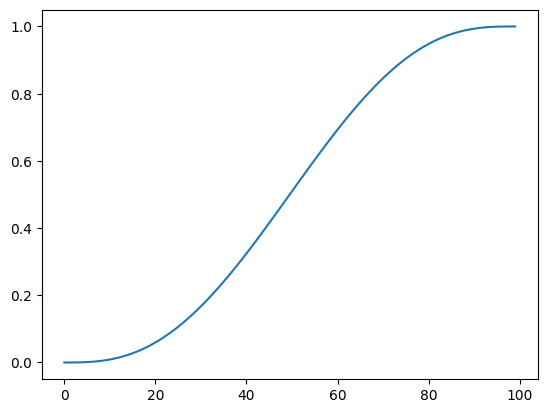

In [29]:
import matplotlib.pyplot as plt
plt.plot(trj)

In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np


def mjtg(current, setpoint, frequency, move_time):
    trajectory = []
    trajectory_derivative = []
    timefreq = int(move_time * frequency)

    for time in range(1, timefreq):
        trajectory.append(
            current + (setpoint - current) *
            (10.0 * (time/timefreq)**3
             - 15.0 * (time/timefreq)**4
             + 6.0 * (time/timefreq)**5))

        trajectory_derivative.append(
            frequency * (1.0/timefreq) * (setpoint - current) *
            (30.0 * (time/timefreq)**2.0
             - 60.0 * (time/timefreq)**3.0
             + 30.0 * (time/timefreq)**4.0))

    return trajectory, trajectory_derivative

# Set up and calculate trajectory.
average_velocity = -5.0
current = 50.0
setpoint = 10.0
frequency = 1000
time = (setpoint - current) / average_velocity

traj, traj_vel = mjtg(current, setpoint, frequency, time)

# Create plot using Plotly
fig = make_subplots(rows=2, cols=1, subplot_titles=["Minimum jerk trajectory", "Velocity"])

# Trajectory subplot
fig.add_trace(go.Scatter(x=np.arange(1, len(traj) + 1) / frequency, y=traj, name="Position"), row=1, col=1)

# Velocity subplot
fig.add_trace(go.Scatter(x=np.arange(1, len(traj_vel) + 1) / frequency, y=traj_vel, name="Velocity"), row=2, col=1)

# Update layout
fig.update_layout(title="Minimum jerk trajectory",
                  xaxis=dict(title="Time [s]"),
                  yaxis=dict(title="Angle [deg]"),
                  yaxis2=dict(title="Angular velocity [deg/s]"))

# Display the plot
fig.show()
